# Stock market analysis project

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tesla = pd.read_csv('Tesla_Stock.csv', parse_dates= True, index_col='Date') 
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [3]:
ford = pd.read_csv('Ford_Stock.csv', parse_dates= True, index_col='Date') 
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [4]:
gm = pd.read_csv('GM_Stock.csv', parse_dates= True, index_col='Date') 
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


## Plotting the open price

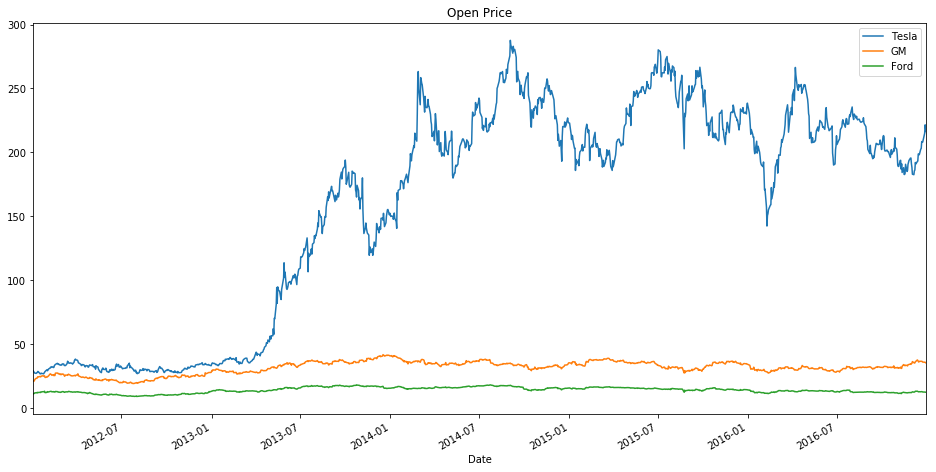

In [5]:
fig = plt.figure(figsize=(16,8))
tesla['Open'].plot(label = 'Tesla')
gm['Open'].plot(label = 'GM')
ford['Open'].plot(label = 'Ford')
plt.title('Open Price')
plt.legend()

## Plotting the volume traded

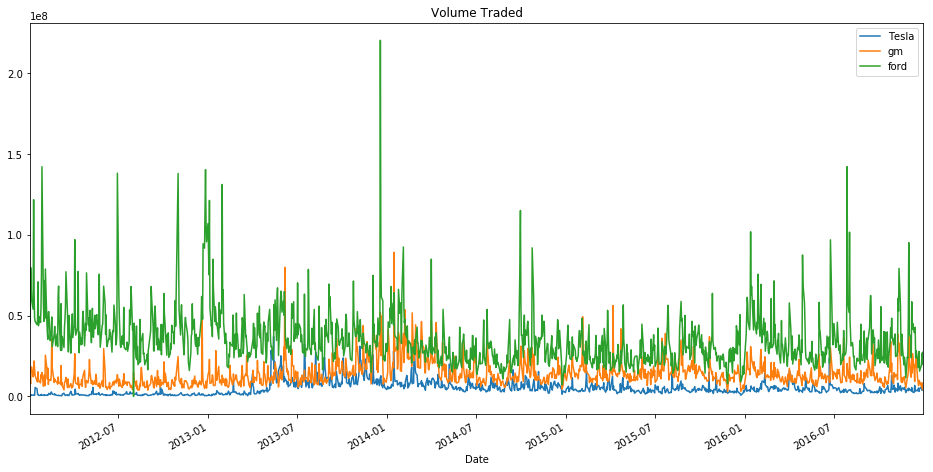

In [6]:
fig = plt.figure(figsize=(16,8))
tesla['Volume'].plot(label = 'Tesla')
gm['Volume'].plot(label = 'gm')
ford['Volume'].plot(label = 'ford')
plt.title('Volume Traded')
plt.legend()

## Finding the timestamp of highest traded volume

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.name.html
ford.loc[ford['Volume'].idxmax()].name

Timestamp('2013-12-18 00:00:00')

In [8]:
ford['Volume'].argmax()

Timestamp('2013-12-18 00:00:00')

In [12]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.name.html
ford.loc[ford['Volume'].idxmax()].name

Timestamp('2013-12-18 00:00:00')

## Creating 'Total Traded' value

In [9]:
tesla['Total Traded'] = tesla['Open']  * tesla['Volume']
tesla.head()

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00


In [10]:
ford['Total Traded'] = ford['Open']  * ford['Volume']
ford.head()

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08


In [11]:
gm['Total Traded'] = gm['Open']  * gm['Volume']
gm.head()

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08


## Plotting 'Total Traded'

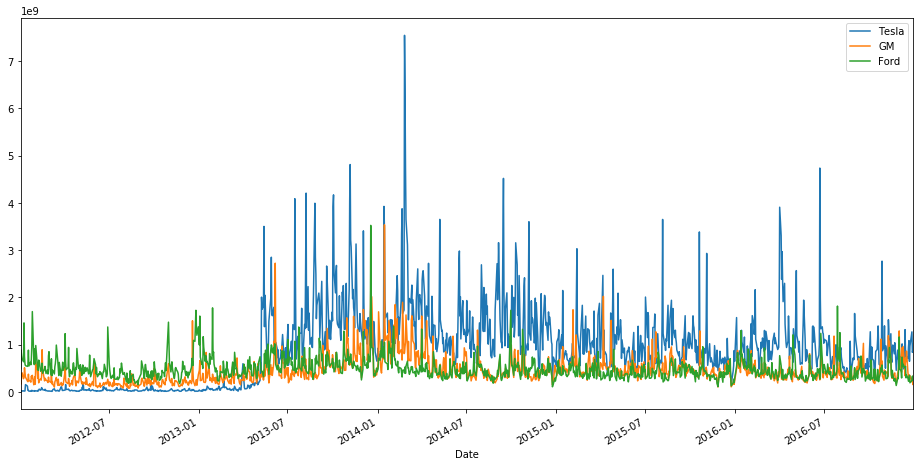

In [13]:
fig = plt.figure(figsize=(16,8))
tesla['Total Traded'].plot(label = 'Tesla')
gm['Total Traded'].plot(label = 'GM')
ford['Total Traded'].plot(label = 'Ford')
plt.legend()

## Finding the timestamp of highest total traded value

In [14]:
tesla.loc[tesla['Total Traded'].idxmax()].name

Timestamp('2014-02-25 00:00:00')

In [15]:
tesla['Total Traded'].argmax()

Timestamp('2014-02-25 00:00:00')

## Plotting moving average (rolling mean)

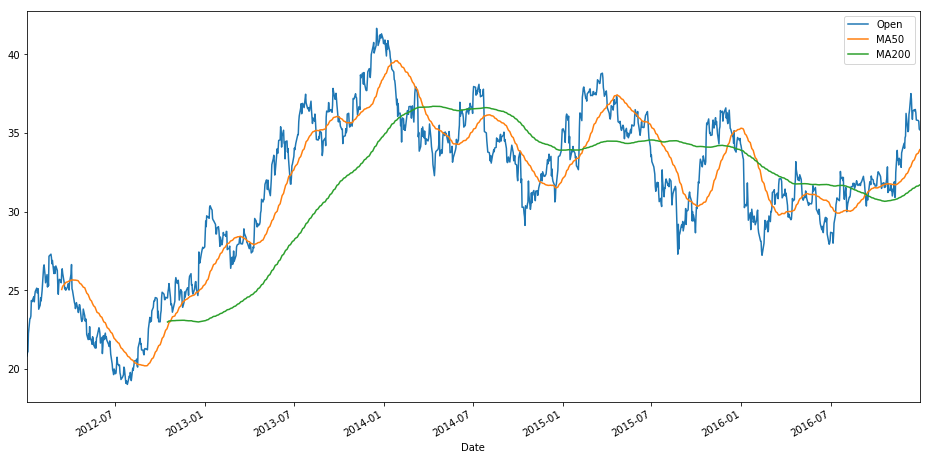

In [16]:
gm['MA50'] = gm['Open'].rolling(window=50).mean()
gm['MA200'] = gm['Open'].rolling(window=200).mean()
gm[['Open','MA50', 'MA200']].plot(figsize=(16,8))

## Plotting scatter matrix

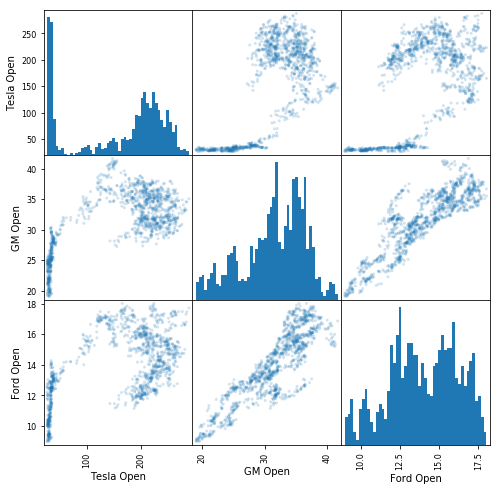

In [17]:
from pandas.plotting import scatter_matrix
# https://stackoverflow.com/questions/30986989/reindex-a-dataframe-with-duplicate-index-values
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rename.html

# Either use rename or use below
df = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis = 1)
df.columns = ['Tesla Open', 'GM Open', 'Ford Open']

df = pd.DataFrame(pd.concat([tesla['Open'].rename('Tesla Open'), gm['Open'].rename('GM Open'), ford['Open'].rename('Ford Open')], axis = 1))
df.head()

# https://stackoverflow.com/questions/43801637/pandas-legend-for-scatter-matrix
# hist_kwds = historgram keywords
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='hist', hist_kwds={'bins':50});

## Plotting candlestick

In [18]:
# https://matplotlib.org/examples/pylab_examples/finance_demo.html

from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num
from matplotlib.finance import candlestick_ohlc

# Creating a ford dataframe suitable as per our needs
ford_reset = ford.loc['2012-01'].reset_index()
ford_reset

,Date,Open,High,Low,Close,Volume,Total Traded
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08
5,2012-01-10,12.00,12.05,11.63,11.80,121750545,1.461007e+09
6,2012-01-11,11.74,12.18,11.65,12.07,63806007,7.490825e+08
7,2012-01-12,12.16,12.18,11.89,12.14,48687666,5.920420e+08
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,5.571280e+08
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,5.416614e+08


In [19]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date            20 non-null datetime64[ns]
Open            20 non-null float64
High            20 non-null float64
Low             20 non-null float64
Close           20 non-null float64
Volume          20 non-null int64
Total Traded    20 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


In [20]:
ford_reset['date_ax'] = ford_reset['Date'].apply(date2num)
ford_reset

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,734505.0
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,734506.0
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,734507.0
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,734508.0
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,734511.0
5,2012-01-10,12.00,12.05,11.63,11.80,121750545,1.461007e+09,734512.0
6,2012-01-11,11.74,12.18,11.65,12.07,63806007,7.490825e+08,734513.0
7,2012-01-12,12.16,12.18,11.89,12.14,48687666,5.920420e+08,734514.0
8,2012-01-13,12.01,12.08,11.84,12.04,46388677,5.571280e+08,734515.0
9,2012-01-17,12.20,12.26,11.96,12.02,44398472,5.416614e+08,734519.0


In [21]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]
ford_values

[(734505.0, 11.0, 11.25, 10.99, 11.130000000000001),
 (734506.0, 11.15, 11.529999999999999, 11.07, 11.300000000000001),
 (734507.0, 11.33, 11.630000000000001, 11.24, 11.59),
 (734508.0, 11.74, 11.800000000000001, 11.52, 11.710000000000001),
 (734511.0, 11.83, 11.949999999999999, 11.699999999999999, 11.800000000000001),
 (734512.0, 12.0, 12.050000000000001, 11.630000000000001, 11.800000000000001),
 (734513.0, 11.74, 12.18, 11.65, 12.07),
 (734514.0, 12.16, 12.18, 11.890000000000001, 12.140000000000001),
 (734515.0, 12.01, 12.08, 11.84, 12.039999999999999),
 (734519.0, 12.199999999999999, 12.26, 11.960000000000001, 12.02),
 (734520.0, 12.029999999999999, 12.369999999999999, 12.0, 12.34),
 (734521.0, 12.48, 12.720000000000001, 12.43, 12.609999999999999),
 (734522.0, 12.550000000000001, 12.640000000000001, 12.449999999999999, 12.59),
 (734525.0, 12.69, 12.84, 12.550000000000001, 12.66),
 (734526.0, 12.56, 12.859999999999999, 12.460000000000001, 12.82),
 (734527.0, 12.800000000000001, 12.98

In [22]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

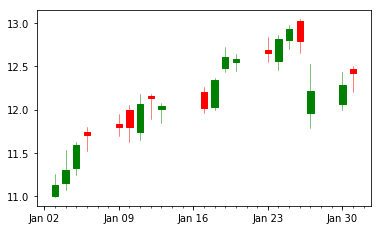

In [24]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, ford_values, width=0.6, colorup = 'g', colordown='r');

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [25]:
# Using the shift method
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

In [26]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html
tesla['returns'] = tesla['Close'].pct_change()
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [27]:
ford['returns'] = ford['Close'].pct_change()
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [28]:
gm['returns'] = gm['Close'].pct_change()
gm.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


## Plotting histograms

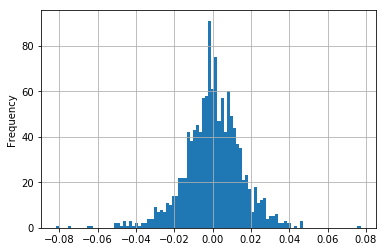

In [29]:
ford['returns'].plot.hist(bins=100, grid=True)

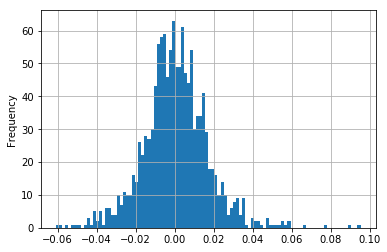

In [30]:
gm['returns'].plot.hist(bins=100, grid=True)

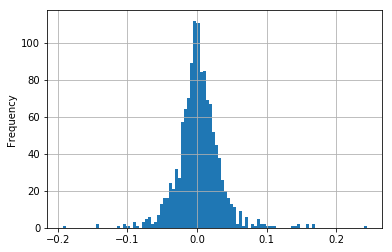

In [31]:
tesla['returns'].plot.hist(bins=100, grid=True)

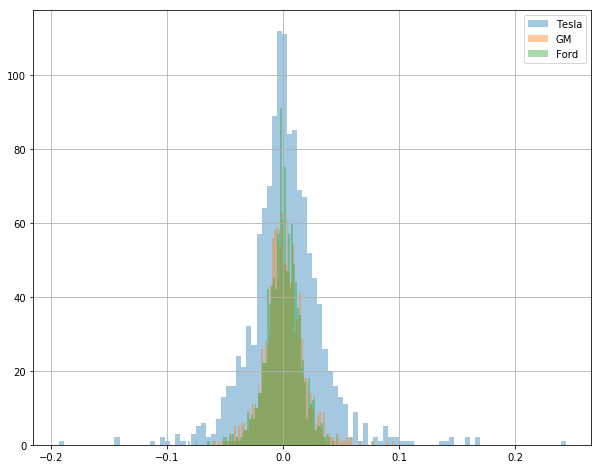

In [32]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(10,8), alpha=0.4)
gm['returns'].hist(bins=100, label='GM', figsize=(10,8), alpha=0.4)
ford['returns'].hist(bins=100, label='Ford', figsize=(10,8), alpha=0.4)
plt.legend();

### Conclusion: Wider distribution = More volatility (Tesla)

## Plotting KDE (Kernel Density Estimation)

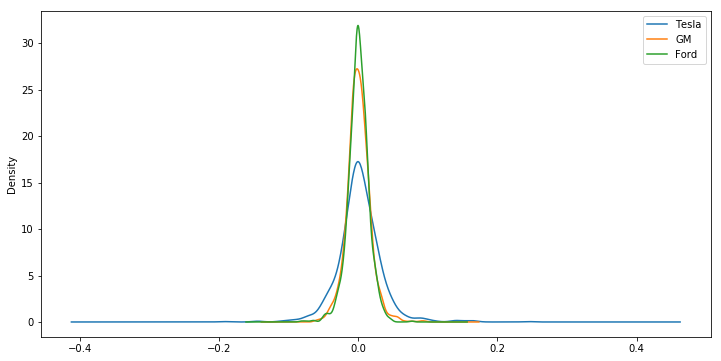

In [36]:
df = pd.concat([tesla['returns'], gm['returns'],ford['returns']], axis = 1)
df.columns = ['Tesla','GM','Ford']
df.plot.kde(figsize=(12,6))

### Conclusion: Higher peaks = More stable stock (Ford)

## Plotting Box

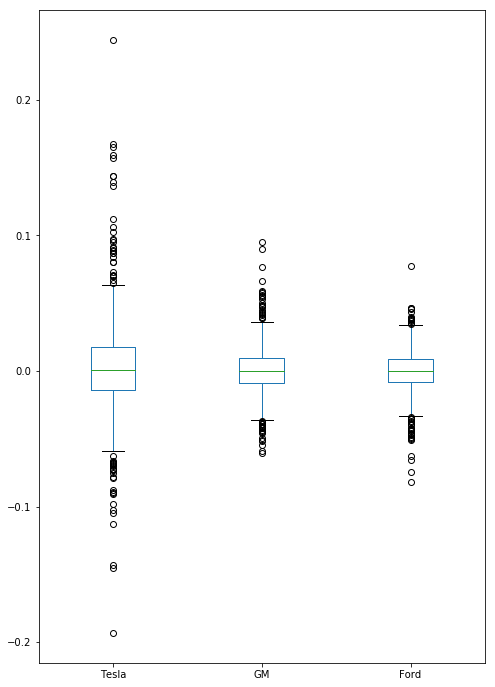

In [35]:
df.plot.box(figsize=(8,12))

### Conclusion: Greater outliers = More volatility (Tesla)

## Observing correlations between 'GM' and 'Ford'

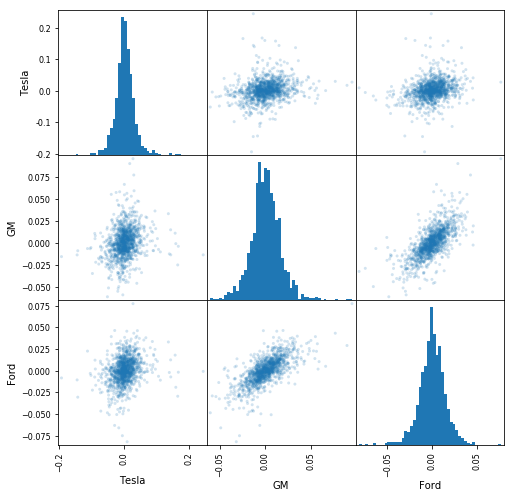

In [37]:
scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='hist', hist_kwds={'bins':50});

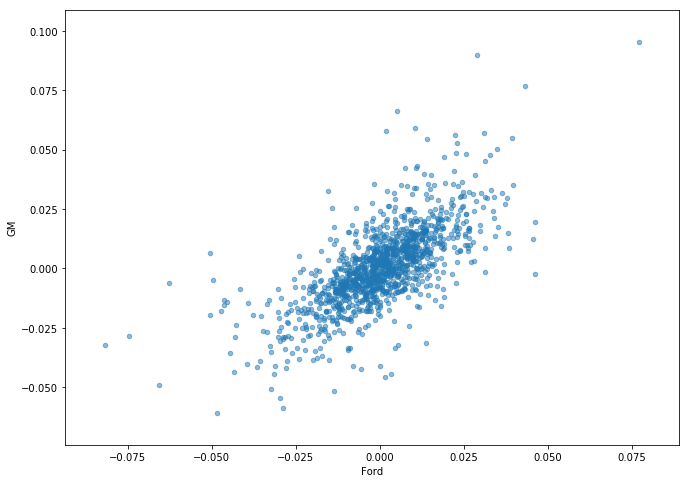

In [38]:
df.plot(kind='scatter', x='Ford', y='GM', alpha=0.5, figsize=(11,8))

## Conclusion: Linear correlation observed

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [40]:
# cumprod - cumulative product
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [41]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686,1.060198


In [42]:
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
gm.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751,1.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227,1.053207
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490,1.085036


## Plotting CDR

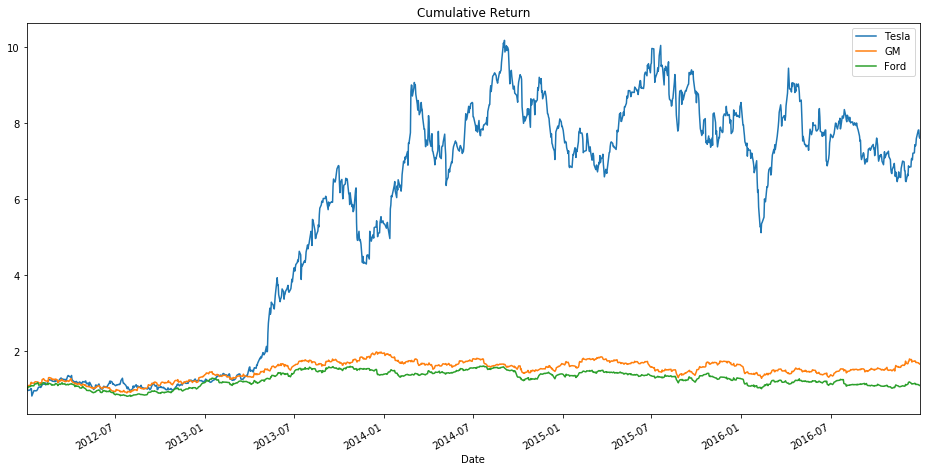

In [43]:
fig = plt.figure(figsize=(16,8))
tesla['Cumulative Return'].plot(label = 'Tesla')
gm['Cumulative Return'].plot(label = 'GM')
ford['Cumulative Return'].plot(label = 'Ford')
plt.title('Cumulative Return')
plt.legend()